# Week 08 - Assignment Part 1

## Regression

### How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

In [ ]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it is usually followed by an even longer wait before the next eruption. If you visit Yellowstone, you might want to predict when the next eruption will happen, so that you can see the rest of the park instead of waiting by the geyser.
 
Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes
- `wait`: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [1]:
import pandas as pd

faithful = pd.read_csv('https://raw.githubusercontent.com/data-8/materials-sp22/main/materials/sp22/lab/lab09/faithful.csv')
faithful.head()

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.

<AxesSubplot:xlabel='duration', ylabel='wait'>

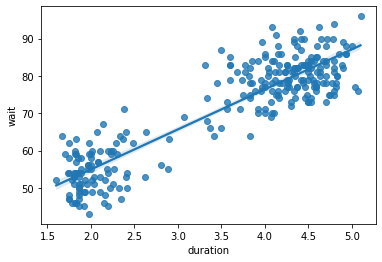

In [3]:
# seaborn plot with line of best fit
import seaborn as sns

sns.regplot(x='duration', y='wait', data=faithful)

Compute the correlation coefficient: `r`.  

In [4]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

r = faithful['duration'].corr(faithful['wait'])
r

0.9008111683218126

We can use Numpy's polyfit to calculate slope and intercept.

In [ ]:
s# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
import numpy as np

x = faithful...
y = faithful...
slope_intercept = np.polyfit(x,y,1)
slope = ...
print(slope)
intercept = ...
print(intercept)


The equation for simple linear regression can look like this:

### $y = \alpha + \beta x$

where $\alpha$ is the intercept and $\beta$ is the coefficient of x.

Using this formula, print the equation for the faithful dataset.

In [ ]:
# print the formula here using the faithful coefficient and intercept
...

### Investigating the regression line

The slope and intercept tell you exactly what the regression line looks like.  To predict the waiting time for an eruption, multiply the eruption's duration by `slope` and then add `intercept`.

Compute the predicted waiting time for an eruption that lasts 2 minutes, and for an eruption that lasts 5 minutes.

In [ ]:
two_minute_predicted_waiting_time = ...
five_minute_predicted_waiting_time = ...

# Here is a helper function to print out your predictions.
# Don't modify the code below.
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

The next cell plots the line that goes between those two points, which is (a segment of) the regression line.

In [ ]:
plot_data_and_line(faithful, "duration", "wait", 
                   [2, two_minute_predicted_waiting_time], 
                   [5, five_minute_predicted_waiting_time])

Make predictions for the waiting time after each eruption in the `faithful` table.  (Of course, we know exactly what the waiting times were!  We are doing this so we can see how accurate our predictions are.)  Put these numbers into a column in a new table called `faithful_predictions`.  Its first row should look like this:

|duration|wait|predicted wait|
|-|-|-|
|3.6|79|72.1011|

*Hint:* Your answer can be just one line, though you are not limited to one line.  There is no need for a `for` loop; use array arithmetic instead.

In [ ]:
faithful_predictions = ...
faithful_predictions

How close were we?  Compute the *residual* for each eruption in the dataset.  The residual is the actual waiting time minus the predicted waiting time.  Add the residuals to `faithful_predictions` as a new column called `residual` and name the resulting table `faithful_residuals`.

*Hint:* Again, your code will be much simpler if you don't use a `for` loop.

In [ ]:
faithful_residuals = ...
faithful_residuals

Here is a plot of the residuals you computed.  Each point corresponds to one eruption.  It shows how much our prediction over- or under-estimated the waiting time.

In [ ]:
faithful_residuals.plot.scatter("duration", "residual")

There isn't really a pattern in the residuals, which confirms that it was reasonable to try linear regression.  It's true that there are two separate clouds; the eruption durations seemed to fall into two distinct clusters.  But that's just a pattern in the eruption durations, not a pattern in the relationship between eruption durations and waiting times.

### How accurate are different predictions?

Earlier, you should have found that the correlation is fairly close to 1, so the line fits fairly well on the training data.  That means the residuals are overall small (close to 0) in comparison to the waiting times.

We can see that visually by plotting the waiting times and residuals together:

In [ ]:
# Just run this cell.
import matplotlib.pyplot as plt

faithful_residuals.plot.scatter("duration", "wait", label="actual waiting time", color="blue")
plt.scatter(faithful_residuals.column("duration"), faithful_residuals.column("residual"), label="residual", color="r")
plt.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time], label="regression line")
plt.legend(bbox_to_anchor=(1.7,.8));

However, unless you have a strong reason to believe that the linear regression model is true, you should be wary of applying your prediction model to data that are very different from the training data.

In faithful, no eruption lasted exactly 0, 2.5, or 60 minutes. Using this line, what is the predicted waiting time for an eruption that lasts 0 minutes? 2.5 minutes? An hour?

In [ ]:
zero_minute_predicted_waiting_time = ...
two_point_five_minute_predicted_waiting_time = ...
hour_predicted_waiting_time = ...

print_prediction(0, zero_minute_predicted_waiting_time)
print_prediction(2.5, two_point_five_minute_predicted_waiting_time)
print_prediction(60, hour_predicted_waiting_time)

For each prediction, state whether you think it's reliable and explain your reasoning. 

_Type your answer here, replacing this text._

### Divide and Conquer

It appears from the scatter diagram that there are two clusters of points: one for durations around 2 and another for durations between 3.5 and 5. A vertical line at 3 divides the two clusters.

In [ ]:
import matplotlib.pyplot as plt

faithful.plot.scatter("duration", "wait", color="blue")
plt.plot([3, 3], [40, 100]);

The `standardize` function from lecture appears below, which takes in a table with numerical columns and returns the same table with each column converted into standard units.

In [ ]:
# Just run this cell.

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
        
    return t_su

Separately compute the correlation coefficient *r* for all the points with a duration below 3 **and then** for all the points with a duration above 3. To do so, create a function that computes `r` from a table, and then pass it two different tables of points, called `below_3` and `above_3`.

*Hint:* You can assume that the table does not have any duration values that are exactly 3.

In [ ]:
def corr_coeff(t):
    """Return the regression coefficient for columns 0 & 1."""
    t_su = standardize(t)
    ...

below_3 = ...
above_3 = ...
below_3_r = corr_coeff(below_3)
above_3_r = corr_coeff(above_3)
print("For points below 3, r is", below_3_r, "; for points above 3, r is", above_3_r)

Complete the functions `slope_of` and `intercept_of` below. 

When you're done, the functions `wait_below_3` and `wait_above_3` should each use a different regression line to predict a wait time for a duration. The first function should use the regression line for all points with duration below 3. The second function should use the regression line for all points with duration above 3.

In [ ]:
def slope_of(table, r):
    """Return the slope of the regression line for table in original units.
    
    Assume that column 0 contains x values and column 1 contains y values.
    r is the regression coefficient for x and y.
    """
    ...

def intercept_of(table, r):
    """Return the intercept of the regression line for table in original units."""
    slope = slope_of(table, r)
    ...
    
below_3_slope = slope_of(below_3, below_3_r)
below_3_intercept = intercept_of(below_3, below_3_r)
above_3_slope = slope_of(above_3, above_3_r)
above_3_intercept = intercept_of(above_3, above_3_r)

def wait_below_3(duration):
    return below_3_slope * duration + below_3_intercept

def wait_above_3(duration):
    return above_3_slope * duration + above_3_intercept

The plot below shows the two different regression lines, one for each cluster, along with the original regression line!

In [ ]:
import matplotlib.pyplot as plt

faithful.plot.scatter(0, 1)
plt.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time])
plt.plot([1, 3], [wait_below_3(1), wait_below_3(3)])
plt.plot([3, 6], [wait_above_3(3), wait_above_3(6)]);

Write a function `predict_wait` that takes a `duration` and returns the predicted wait time using the appropriate regression line, depending on whether the duration is below 3 or greater than (or equal to) 3.

In [ ]:
def predict_wait(duration):
    ...

The predicted wait times for each point appear below.

In [ ]:
faithful_pred_split = faithful.with_column('predicted', faithful.apply(predict_wait, 'duration'))
faithful_pred_split.scatter(0)

Do you think the predictions produced by `predict_wait` would be more or less accurate than the predictions from the regression line you created in section 2? How could you tell?

_Type your answer here, replacing this text._

The following cell will plot the residuals for each eruption in the dataset when we have one regression line and two regression lines. We also see the average magnitude of the residual values.

In [ ]:
# Just run this cell
faithful_pred_split_residuals = faithful_pred_split.with_column('residual', faithful_pred_split.column(1) - faithful_pred_split.column(2))
plots.scatter(faithful_residuals.column('duration'), faithful_residuals.column('residual'), label='one regression line')
plots.scatter(faithful_pred_split_residuals.column('duration'), faithful_pred_split_residuals.column('residual'), label='two regression lines');
plots.axis([1, 6, -15, 15])
plots.legend(bbox_to_anchor=(1.5,.8));
print("Average Magnitude of Residual Values for One Regression Line: ", np.mean(abs(faithful_residuals.column('residual'))))
print("Average Magnitude of Residual Values for Two Regression Lines: ", np.mean(abs(faithful_pred_split_residuals.column('residual'))))

The residual plot for the wait times when they are predicted by two regression lines (red) doesn't really have a pattern, which confirms that it was also appropriate to use linear regression in our "Divide and Conquer" scenario. How do the two residual plots compare?